In [11]:
!pip install -q kaggle

In [12]:
!rm -rf /content/data/final_dataset

In [13]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [14]:
!cp kaggle.json ~/.kaggle

In [15]:
! chmod 600 ~/.kaggle/kaggle.json

In [16]:
! kaggle datasets list

ref                                                       title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                     Data Science Salaries 2023 💸                   25KB  2023-04-13 09:55:16          20350        567  1.0              
fatihb/coffee-quality-data-cqi                            Coffee Quality Data (CQI May-2023)             22KB  2023-05-12 13:06:39           1776         47  1.0              
ashpalsingh1525/imdb-movies-dataset                       IMDB movies dataset                             3MB  2023-04-28 23:18:15           2287         47  1.0              
iammustafatz/diabetes-prediction-dataset                  Diabetes prediction dataset                   734KB  2023-04-0

In [17]:
! kaggle datasets download -d riyaelizashaju/isic-skin-disease-image-dataset-labelled

100% 9.09G/9.10G [05:18<00:00, 19.8MB/s]
100% 9.10G/9.10G [05:18<00:00, 30.6MB/s]


In [18]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import random
from glob import glob
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
import matplotlib.image as img
import zipfile

In [19]:
# extracting data from zip
local_zip = 'isic-skin-disease-image-dataset-labelled.zip'
target_extraction = './data/data_2'
file_check = "ISIC_Labelled"

try:
    if os.path.exists(os.path.join(target_extraction, file_check)):
        print("File Already Extracted")
    else:
        zip_ref = zipfile.ZipFile(local_zip, 'r')
        zip_ref.extractall(target_extraction)
        zip_ref.close()
#if data is already extracted it will instead print file already extracted
except FileNotFoundError:
    print('Zip File Not Found!')

In [20]:
path = './data/data_2/ISIC_Labelled'

dir_new = ['melanoma', 'melanocytic_nevi', 'basal_cell_carcinoma', 'bowen_disease', 'benign_keratosis', 'dermatofibroma', 'vascular_lesions', 'squamous_cell_carcinoma']
dir_old = ['Melanoma', 'Melanocytic nevus', 'Basal cell carcinoma', 'Actinic keratosis', 'Benign keratosis', 'Dermatofibroma', 'Vascular lesion', 'Squamous cell carcinoma']

counter = 0

for filename in os.listdir(path):
    file_path = os.path.join(path, filename)
    name = os.path.splitext(filename)
    
    for i, x in enumerate(dir_old):
        if x in name:
            postfix = dir_new[i]
            new_name = os.path.join(path, postfix)
            os.rename(file_path, new_name)
            continue
    counter += 1

In [21]:
path = '/content/data/data_2/ISIC_Labelled'
counter = 0
dir_names=['melanoma', 'melanocytic_nevi', 'basal_cell_carcinoma', 'bowen_disease', 'benign_keratosis','squamous_cell_carcinoma', 'dermatofibroma', 'vascular_lesions']

for file in (dir_names):
    dir = os.listdir(f"{path}/{file}")
    
    print(f"Data for {file} is {len(dir)}")

Data for melanoma is 4522
Data for melanocytic_nevi is 12875
Data for basal_cell_carcinoma is 3323
Data for bowen_disease is 867
Data for benign_keratosis is 2624
Data for squamous_cell_carcinoma is 628
Data for dermatofibroma is 239
Data for vascular_lesions is 253


In [22]:
!pip install augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import Augmentor
for i in dir_names:
    p = Augmentor.Pipeline(f"/content/data/data_2/ISIC_Labelled/{i}", output_directory=f'/content/data/final_dataset/{i}')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(1500) 

Initialised with 4522 image(s) found.
Output directory set to /content/data/final_dataset/melanoma.

Processing <PIL.Image.Image image mode=RGB size=1024x1024 at 0x7F4D3FF19F90>: 100%|██████████| 1500/1500 [02:32<00:00,  9.82 Samples/s]


Initialised with 12875 image(s) found.
Output directory set to /content/data/final_dataset/melanocytic_nevi.

Processing <PIL.Image.Image image mode=RGB size=1024x1024 at 0x7F4D2ED2EAA0>: 100%|██████████| 1500/1500 [01:51<00:00, 13.42 Samples/s]


Initialised with 3323 image(s) found.
Output directory set to /content/data/final_dataset/basal_cell_carcinoma.

Processing <PIL.Image.Image image mode=RGB size=1024x1024 at 0x7F4D3C05A1A0>: 100%|██████████| 1500/1500 [02:48<00:00,  8.89 Samples/s]


Initialised with 867 image(s) found.
Output directory set to /content/data/final_dataset/bowen_disease.

Processing <PIL.Image.Image image mode=RGB size=1024x1024 at 0x7F4D3FF1B970>: 100%|██████████| 1500/1500 [02:54<00:00,  8.60 Samples/s]


Initialised with 2624 image(s) found.
Output directory set to /content/data/final_dataset/benign_keratosis.

Processing <PIL.Image.Image image mode=RGB size=1024x680 at 0x7F4D3C01D7E0>: 100%|██████████| 1500/1500 [02:08<00:00, 11.66 Samples/s]


Initialised with 628 image(s) found.
Output directory set to /content/data/final_dataset/squamous_cell_carcinoma.

Processing <PIL.Image.Image image mode=RGB size=1024x1024 at 0x7F4D41124370>: 100%|██████████| 1500/1500 [02:23<00:00, 10.45 Samples/s]


Initialised with 239 image(s) found.
Output directory set to /content/data/final_dataset/dermatofibroma.

Processing <PIL.Image.Image image mode=RGB size=1024x1024 at 0x7F4D3C0A73A0>: 100%|██████████| 1500/1500 [02:08<00:00, 11.65 Samples/s]


Initialised with 253 image(s) found.
Output directory set to /content/data/final_dataset/vascular_lesions.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4D3C0DDDE0>: 100%|██████████| 1500/1500 [01:56<00:00, 12.91 Samples/s]


In [24]:
output_dir = pathlib.Path('/content/data/final_dataset')
image_count_train = len(list(output_dir.glob('*/*.jpg')))
print(image_count_train)


12000


In [28]:
training_main = pathlib.Path('/content/data/final_dataset/')

In [30]:
image_count_train = len(os.listdir(training_main))
print(image_count_train)
image_count_test = len(list(training_main.glob('*.jpg')))
print(image_count_test)

8
0


In [31]:
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  training_main,
  shuffle=True,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(150, 150),
  batch_size=batch_size)

Found 12000 files belonging to 8 classes.
Using 9600 files for training.


In [32]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  training_main,
  shuffle=True,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(150,150),
  batch_size=batch_size)

Found 12000 files belonging to 8 classes.
Using 2400 files for validation.


In [33]:
validation_size = int(0.5 * val_ds.cardinality().numpy())
test_ds = val_ds.take(validation_size)
val_ds = val_ds.take(validation_size)

In [34]:
print("Training Set Size: %d" % train_ds.cardinality().numpy())
print("Validation Set Size: %d" % val_ds.cardinality().numpy())
print("Test Set Size: %d" % test_ds.cardinality().numpy())

Training Set Size: 300
Validation Set Size: 37
Test Set Size: 37


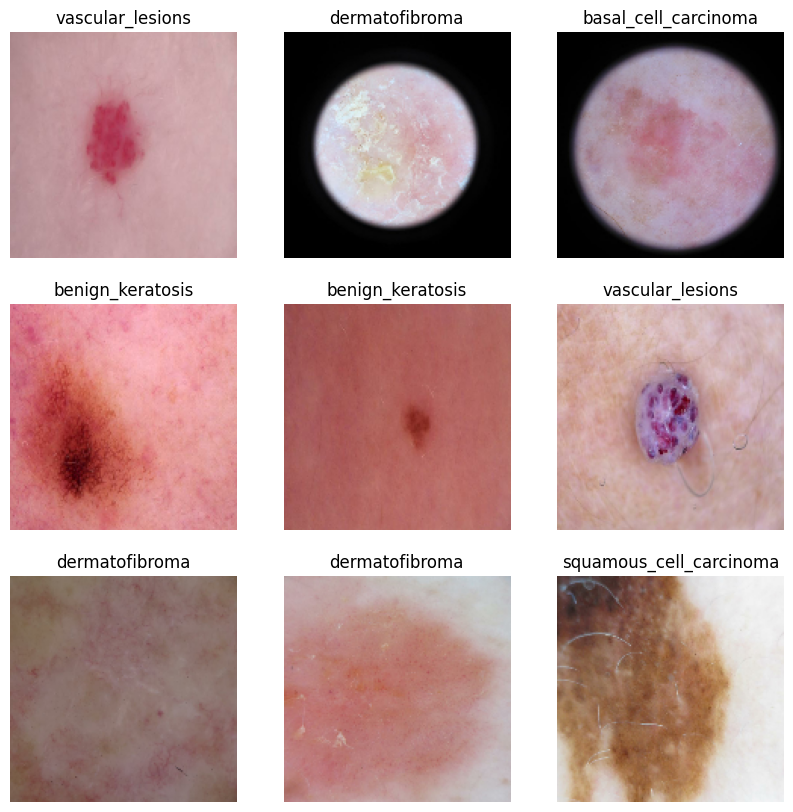

In [35]:
plt.figure(figsize=(10, 10))
for image, label in val_ds.take(1):
    for i in range (9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(dir_names[label[i]])
        plt.axis("off")

In [36]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [37]:
IMG_SIZE = (150,150)
IMG_SHAPE = IMG_SIZE + (3,)
resnet50 = tf.keras.applications.resnet50
conv_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)

94765736/94765736 [==============================] - 3s 0us/step


In [38]:
conv_model.trainable = False

In [39]:
conv_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']      

In [40]:
def data_augmenter ():
    data_augmentation = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
        ])
    
    return data_augmentation

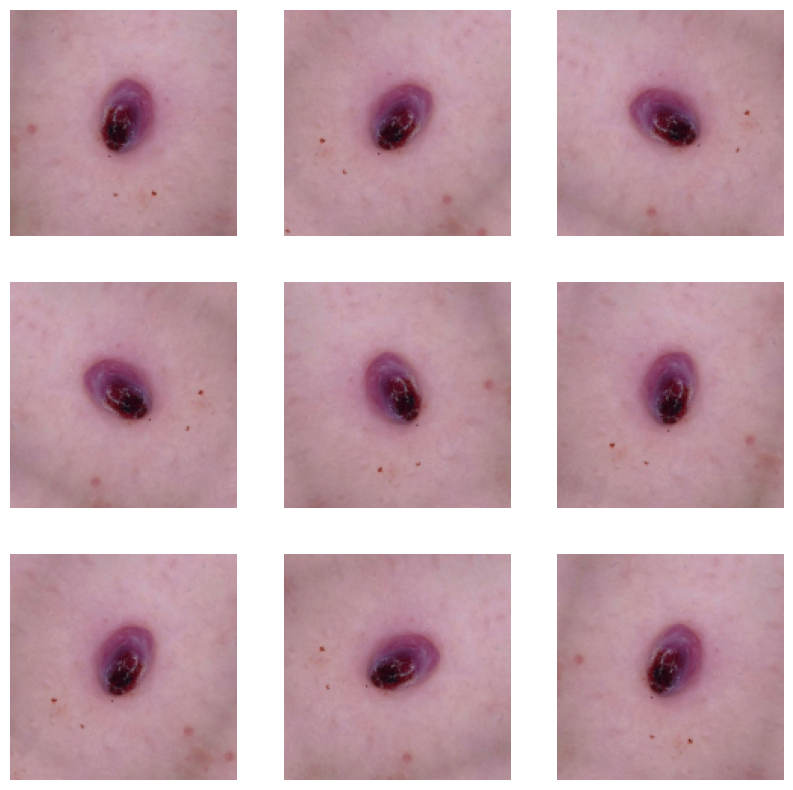

In [41]:
data_augmentation = data_augmenter()

for image, _ in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [42]:
preprocess_input = tf.keras.applications.resnet50.preprocess_input
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = conv_model(x)
x = tf.keras.layers.GlobalAveragePooling2D()(conv_model.output)

predictions = tf.keras.layers.Dense(8, activation='softmax')(x)
full_model = tf.keras.models.Model(inputs=conv_model.input, outputs=predictions)
full_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']         

In [70]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, Adamax
model_name='EfficientNetB5'
base_model=tf.keras.applications.EfficientNetB1(include_top=False, weights="imagenet",input_shape=IMG_SHAPE, pooling='max') 
x=base_model.output
x=tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.45, seed=123)(x)        
output=Dense(8, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)
model.compile(Adamax(learning_rate=.001), loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

In [54]:
base_learning_rate = 0.001

full_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
                  metrics=['accuracy'])

In [71]:
initial_epochs = 15
history6 =model.fit(train_ds, validation_data=val_ds, validation_steps=int(0.2*len(val_ds)), epochs=initial_epochs)

Epoch 1/15
300/300 [==============================] - 122s 206ms/step - loss: 7.3543 - accuracy: 0.4625 - val_loss: 5.3042 - val_accuracy: 0.7009
Epoch 2/15
300/300 [==============================] - 55s 184ms/step - loss: 4.1725 - accuracy: 0.7085 - val_loss: 3.1341 - val_accuracy: 0.7679
Epoch 3/15
300/300 [==============================] - 57s 189ms/step - loss: 2.4258 - accuracy: 0.8365 - val_loss: 1.9419 - val_accuracy: 0.7991
Epoch 4/15
300/300 [==============================] - 55s 185ms/step - loss: 1.4066 - accuracy: 0.9053 - val_loss: 1.2840 - val_accuracy: 0.8348
Epoch 5/15
300/300 [==============================] - 57s 189ms/step - loss: 0.8508 - accuracy: 0.9421 - val_loss: 0.9680 - val_accuracy: 0.8438
Epoch 6/15
300/300 [==============================] - 55s 185ms/step - loss: 0.5664 - accuracy: 0.9665 - val_loss: 0.7957 - val_accuracy: 0.8482
Epoch 7/15
300/300 [==============================] - 56s 186ms/step - loss: 0.4177 - accuracy: 0.9767 - val_loss: 0.7706 - val_a

In [ ]:
full_model.save('./model_weights/skin_model(this_model_kinda_good).h5')

In [ ]:

acc = history3.history['accuracy']
loss = history3.history['loss']
val_acc = history3.history['val_accuracy']
val_loss = history3.history['val_loss']

plt.figure(figsize=(8, 11))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(loc='upper left')
plt.title('Training vs Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper left')
plt.title('Training vs Validation Loss')